**Recommendation system**

Build a recommender system by using cosine simillarties score.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving book.csv to book.csv


In [ ]:
book=pd.read_csv('book.csv', encoding="ISO-8859-1")
book

Unnamed: 0  User.ID                                         Book.Title  \
0              1   276726                                Classical Mythology   
1              2   276729                                       Clara Callan   
2              3   276729                               Decision in Normandy   
3              4   276736  Flu: The Story of the Great Influenza Pandemic...   
4              5   276737                             The Mummies of Urumchi   
...          ...      ...                                                ...   
9995        9996   162121       American Fried: Adventures of a Happy Eater.   
9996        9997   162121                              Cannibal In Manhattan   
9997        9998   162121                    How to Flirt: A Practical Guide   
9998        9999   162121                                           Twilight   
9999       10000   162129                       Kids Say the Darndest Things   

      Book.Rating  
0               5  
1               3  
2               6  
3               8  
4               6  
...           ...  
9995            7  
9996            9  
9997            7  
9998            8  
9999            6  

[10000 rows x 4 columns]

In [ ]:
book.head()

Unnamed: 0  User.ID                                         Book.Title  \
0           1   276726                                Classical Mythology   
1           2   276729                                       Clara Callan   
2           3   276729                               Decision in Normandy   
3           4   276736  Flu: The Story of the Great Influenza Pandemic...   
4           5   276737                             The Mummies of Urumchi   

   Book.Rating  
0            5  
1            3  
2            6  
3            8  
4            6

In [ ]:
book.shape

(10000, 4)

In [ ]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10000 non-null  int64 
 1   User.ID      10000 non-null  int64 
 2   Book.Title   10000 non-null  object
 3   Book.Rating  10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


In [ ]:
book.tail()

Unnamed: 0  User.ID                                    Book.Title  \
9995        9996   162121  American Fried: Adventures of a Happy Eater.   
9996        9997   162121                         Cannibal In Manhattan   
9997        9998   162121               How to Flirt: A Practical Guide   
9998        9999   162121                                      Twilight   
9999       10000   162129                  Kids Say the Darndest Things   

      Book.Rating  
9995            7  
9996            9  
9997            7  
9998            8  
9999            6

In [ ]:
book.isnull().sum()

Unnamed: 0     0
User.ID        0
Book.Title     0
Book.Rating    0
dtype: int64

In [ ]:
book.drop(book.columns[0],axis=1,inplace=True)
book

User.ID                                         Book.Title  Book.Rating
0      276726                                Classical Mythology            5
1      276729                                       Clara Callan            3
2      276729                               Decision in Normandy            6
3      276736  Flu: The Story of the Great Influenza Pandemic...            8
4      276737                             The Mummies of Urumchi            6
...       ...                                                ...          ...
9995   162121       American Fried: Adventures of a Happy Eater.            7
9996   162121                              Cannibal In Manhattan            9
9997   162121                    How to Flirt: A Practical Guide            7
9998   162121                                           Twilight            8
9999   162129                       Kids Say the Darndest Things            6

[10000 rows x 3 columns]

In [ ]:
book.nunique()

User.ID        2182
Book.Title     9659
Book.Rating      10
dtype: int64

In [ ]:
book.columns = ["UserID", "BookTitle","BookRating"]

In [ ]:
book

UserID                                          BookTitle  BookRating
0     276726                                Classical Mythology           5
1     276729                                       Clara Callan           3
2     276729                               Decision in Normandy           6
3     276736  Flu: The Story of the Great Influenza Pandemic...           8
4     276737                             The Mummies of Urumchi           6
...      ...                                                ...         ...
9995  162121       American Fried: Adventures of a Happy Eater.           7
9996  162121                              Cannibal In Manhattan           9
9997  162121                    How to Flirt: A Practical Guide           7
9998  162121                                           Twilight           8
9999  162129                       Kids Say the Darndest Things           6

[10000 rows x 3 columns]

In [ ]:
book = book.sort_values(by=['UserID'])

In [ ]:
len(book.UserID.unique())

2182

In [ ]:
len(book.BookTitle.unique())

9659

In [ ]:
book.loc[book["BookRating"]=='small', 'BookRating'] = 0
book.loc[book["BookRating"]=='large', 'BookRating'] = 1

In [ ]:
book.BookRating.value_counts()

8     2283
7     2076
10    1732
9     1493
5     1007
6      920
4      237
3      146
2       63
1       43
Name: BookRating, dtype: int64

<ipython-input-25-6041d03c7851>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(book.BookRating)


<Axes: xlabel='BookRating', ylabel='Density'>

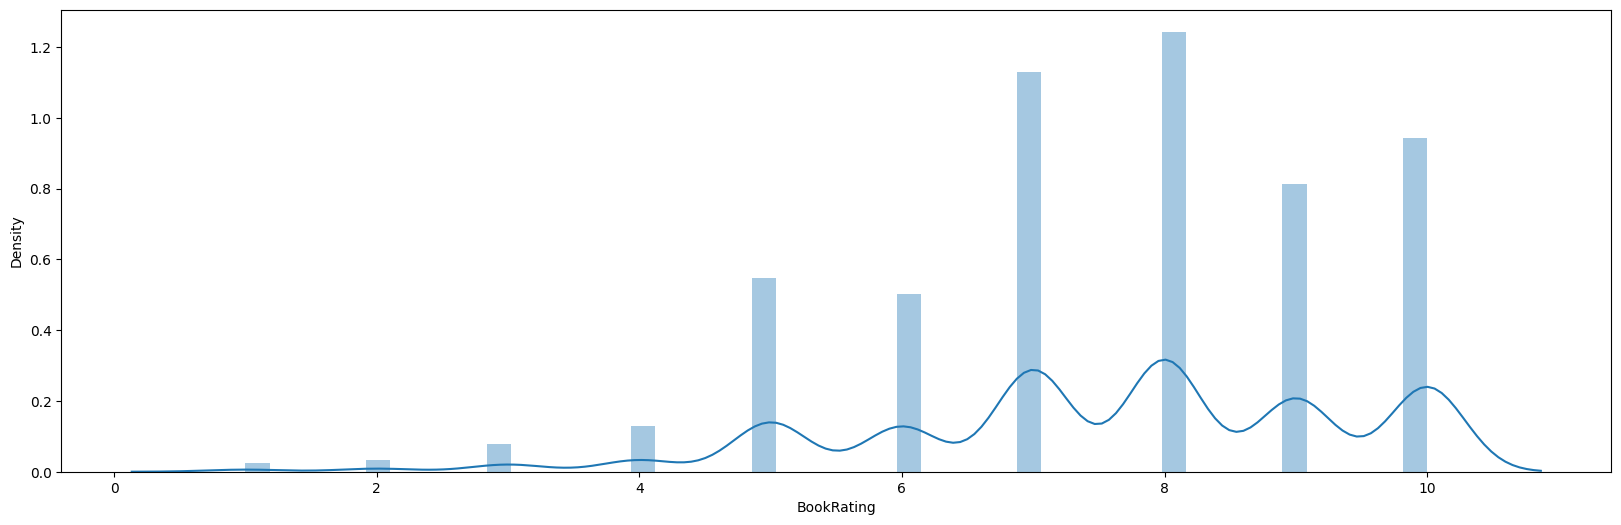

In [ ]:
plt.figure(figsize=(20,6))
sns.distplot(book.BookRating)

In [ ]:
book_df = book.pivot_table(index='UserID',
                           columns='BookTitle',
                           values='BookRating').reset_index(drop=True)

In [ ]:
book_df.fillna(0,inplace=True)

In [ ]:
book_df

BookTitle   Jason, Madison &amp   Other Stories;Merril;1985;McClelland &amp  \
0                           0.0                                         0.0   
1                           0.0                                         0.0   
2                           0.0                                         0.0   
3                           0.0                                         0.0   
4                           0.0                                         0.0   
...                         ...                                         ...   
2177                        0.0                                         0.0   
2178                        0.0                                         0.0   
2179                        0.0                                         0.0   
2180                        0.0                                         0.0   
2181                        0.0                                         0.0   

BookTitle   Repairing PC Drives &amp  '48  \
0                                0.0  0.0   
1                                0.0  0.0   
2                                0.0  0.0   
3                                0.0  0.0   
4                                0.0  0.0   
...                              ...  ...   
2177                             0.0  0.0   
2178                             0.0  0.0   
2179                             0.0  0.0   
2180                             0.0  0.0   
2181                             0.0  0.0   

BookTitle  'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities  \
0                                                        0.0                       
1                                                        0.0                       
2                                                        0.0                       
3                                                        0.0                       
4                                                        0.0                       
...                                                      ...                       
2177                                                     0.0                       
2178                                                     0.0                       
2179                                                     0.0                       
2180                                                     0.0                       
2181                                                     0.0                       

BookTitle  ...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR  \
0                                                        0.0              
1                                                        0.0              
2                                                        0.0              
3                                                        0.0              
4                                                        0.0              
...                                                      ...              
2177                                                     0.0              
2178                                                     0.0              
2179                                                     0.0              
2180                                                     0.0              
2181                                                     0.0              

BookTitle  01-01-00: A Novel of the Millennium  \
0                                          0.0   
1                                          0.0   
2                                          0.0   
3                                          0.0   
4                                          0.0   
...                                        ...   
2177                                       0.0   
2178                                       0.0   
2179                                       0.0   
2180                                       0.0   
2181                                       0.0   


Average Ratings of Book

In [ ]:
AVG = book['BookRating'].mean()
AVG

7.5663

In [ ]:
minimum = book['BookRating'].quantile(0.90)
minimum

10.0

In [ ]:
q_Books = book.copy().loc[book['BookRating'] >= minimum]
q_Books.shape

(1732, 3)

In [ ]:
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine, correlation

In [ ]:
user_sim=1-pairwise_distances(book_df.values, metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [ ]:
user_sim_df=pd.DataFrame(user_sim)
user_sim_df

0     1     2     3     4     5     6     7     8     9     ...  2172  \
0      1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2177   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2178   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2179   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2180   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2181   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      2173  2174  2175  2176  2177  2178  2179  2180  2181  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
2177   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0  
2178   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0  
2179   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0  
2180   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0  
2181   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0  

[2182 rows x 2182 columns]

In [ ]:
np.fill_diagonal(user_sim,0)
user_sim_df

0     1     2     3     4     5     6     7     8     9     ...  2172  \
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
2177   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2178   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2179   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2180   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2181   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

      2173  2174  2175  2176  2177  2178  2179  2180  2181  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
2177   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2178   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2179   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2180   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2181   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[2182 rows x 2182 columns]

In [ ]:
#List of Similar Users
print(user_sim_df.idxmax(axis=1)[1348])
print(user_sim_df.max(axis=1).sort_values(ascending=False).head(50))

0
1100    1.000000
427     1.000000
1545    1.000000
2001    1.000000
561     1.000000
657     1.000000
1722    1.000000
1985    1.000000
1625    1.000000
1976    1.000000
1970    1.000000
1528    1.000000
180     1.000000
179     1.000000
1235    1.000000
253     1.000000
359     1.000000
721     1.000000
1596    1.000000
1101    1.000000
1426    1.000000
364     0.752577
1573    0.707107
28      0.707107
2134    0.668965
1578    0.668965
1708    0.662266
2010    0.662266
1997    0.613941
1939    0.613941
994     0.549972
1813    0.549972
1804    0.515325
1814    0.515325
1584    0.502571
1705    0.502571
2125    0.500000
1914    0.498464
565     0.498464
137     0.495904
1072    0.495904
1938    0.476290
1561    0.476290
705     0.463241
1187    0.463241
1124    0.453638
1180    0.453638
323     0.437426
1828    0.437426
1489    0.384900
dtype: float64




1 shows that the two user ID have read the same books

1348 has highest correlation with 2576 UserID


In [ ]:
reader = book[(book['UserID']==1348) | (book['UserID']==2576)]
reader

UserID                                BookTitle  BookRating
3915    1348  Fantastic Beasts and Where to Find Them           7
3916    1348                                 Stardust           8
5699    2576                                 Stardust          10

In [ ]:
reader1 = book[(book['UserID']==1348)]
reader1

UserID                                BookTitle  BookRating
3915    1348  Fantastic Beasts and Where to Find Them           7
3916    1348                                 Stardust           8

In [ ]:
reader2 = book[(book['UserID']==2576)]
reader2

UserID BookTitle  BookRating
5699    2576  Stardust          10

Stardust book has 10 BookRating